In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [78]:
df=pd.read_csv("customer_churn - customer_churn.csv")

In [79]:
df.shape

(7043, 21)

In [80]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [82]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [83]:
df.isnull().sum().sort_values(ascending=False)

TotalCharges        11
gender               0
SeniorCitizen        0
Partner              0
customerID           0
Dependents           0
tenure               0
MultipleLines        0
PhoneService         0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
InternetService      0
TechSupport          0
StreamingTV          0
Contract             0
StreamingMovies      0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
Churn                0
dtype: int64

In [84]:
df.drop(['customerID'], axis=1, inplace=True)

In [85]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
categorical_cols

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

In [86]:
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
numeric_cols

['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

In [87]:
df_before = df.copy()

In [88]:
for col in categorical_cols:df[col].fillna(df[col].mode()[0], inplace=True)
for col in numeric_cols:df[col].fillna(df[col].mean(), inplace=True)

In [89]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [90]:
for col in df.columns:
    if df[col].dtypes == 'object':
        print(f'{col}: {df[col].unique()}')

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [91]:
df.replace({'No phone service': 'No', 'No internet service': 'No'}, inplace=True)

In [92]:
for col in df.columns:
    if df[col].dtypes == 'object':
        df[col].replace({'Yes': 1, 'No': 0}, inplace=True)

df.dtypes

gender               object
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines         int64
InternetService      object
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract             object
PaperlessBilling      int64
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object

In [93]:
df['gender']=df['gender'].replace({'Female':1,'Male':0})

In [94]:
!pip install category_encoders

In [95]:
import category_encoders as ce
encoder=ce.OneHotEncoder(cols=['InternetService','Contract','PaymentMethod'])
df=encoder.fit_transform(df)

In [96]:
df.dtypes

gender                 int64
SeniorCitizen          int64
Partner                int64
Dependents             int64
tenure                 int64
PhoneService           int64
MultipleLines          int64
InternetService_1      int64
InternetService_2      int64
InternetService_3      int64
OnlineSecurity         int64
OnlineBackup           int64
DeviceProtection       int64
TechSupport            int64
StreamingTV            int64
StreamingMovies        int64
Contract_1             int64
Contract_2             int64
Contract_3             int64
PaperlessBilling       int64
PaymentMethod_1        int64
PaymentMethod_2        int64
PaymentMethod_3        int64
PaymentMethod_4        int64
MonthlyCharges       float64
TotalCharges         float64
Churn                  int64
dtype: object

In [97]:
#split the dataset into input features and target column
x=df.drop("Churn",axis=1)
y=df["Churn"]

In [98]:
df["Churn"].value_counts()

Churn
0    5174
1    1869
Name: count, dtype: int64

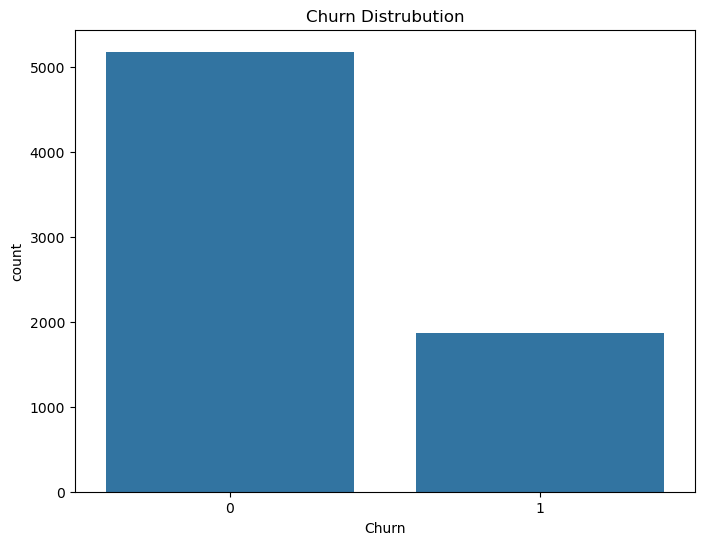

In [99]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Churn', data=df)
plt.title('Churn Distrubution')
plt.show()

In [100]:
x.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService_1,InternetService_2,InternetService_3,...,Contract_1,Contract_2,Contract_3,PaperlessBilling,PaymentMethod_1,PaymentMethod_2,PaymentMethod_3,PaymentMethod_4,MonthlyCharges,TotalCharges
0,1,0,1,0,1,0,0,1,0,0,...,1,0,0,1,1,0,0,0,29.85,29.85
1,0,0,0,0,34,1,0,1,0,0,...,0,1,0,0,0,1,0,0,56.95,1889.50
2,0,0,0,0,2,1,0,1,0,0,...,1,0,0,1,0,1,0,0,53.85,108.15
3,0,0,0,0,45,0,0,1,0,0,...,0,1,0,0,0,0,1,0,42.30,1840.75
4,1,0,0,0,2,1,0,0,1,0,...,1,0,0,1,1,0,0,0,70.70,151.65


In [101]:
# split the dataset into training and testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [102]:
x_train.shape,y_train.shape

((5634, 26), (5634,))

In [103]:
x_test.shape,y_test.shape

((1409, 26), (1409,))

In [104]:
#Build an FNN Model
!pip install tensorflow

In [105]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [106]:
#build the model
model=tf.keras.Sequential([
    keras.layers.Dense(26,input_shape=(26,),activation='relu'),
    keras.layers.Dense(15,activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')])

In [107]:
# Compile the model
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [108]:
# Train the model
model.fit(x_train, y_train, epochs=100)

Epoch 1/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6305 - loss: 34.7537 
Epoch 2/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7188 - loss: 1.4782
Epoch 3/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7389 - loss: 0.9882
Epoch 4/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7449 - loss: 0.9757
Epoch 5/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7540 - loss: 0.9885
Epoch 6/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7545 - loss: 0.7377
Epoch 7/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7614 - loss: 0.7168
Epoch 8/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7559 - loss: 0.9289
Epoch 9/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7581 - loss: 0.8752
Epoch 10/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7478 - loss: 1.3532
Epoch 11/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7583 - loss: 0.8926
Epoch 12/100
177/177 ━━━━━━━━━━━━━━━━━━

In [109]:
model.evaluate(x_test,y_test)

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7388 - loss: 0.5387


[0.5386502146720886, 0.7388218641281128]

In [110]:
# View weights and biases for each layer
for i, layer in enumerate(model.layers):
    weights, biases = layer.get_weights()
    print(weights)
    print()
    print("\n")

[[-3.86300951e-01 -6.60531670e-02  1.16753995e-01  4.09918390e-02
  -3.17017436e-01 -3.21266472e-01 -2.96568990e-01 -3.58157098e-01
  -1.66617166e-02  2.11117506e-01 -3.82795006e-01 -8.15060362e-02
  -7.58803189e-02 -4.96323826e-03 -9.28838849e-02 -2.27899954e-01
  -7.82698989e-02 -2.51470953e-01 -2.84466028e-01  8.24570134e-02
   1.64903462e-01 -1.34668276e-02  2.28383183e-01  1.93371072e-01
   2.57840455e-01 -1.35250539e-01]
 [ 1.19762570e-01 -1.59435377e-01  1.84845269e-01  3.27215701e-01
  -2.40259603e-01 -8.73588920e-02  2.01627165e-01 -1.50559425e-01
   5.93395889e-01 -2.25499272e-03  2.19945088e-01 -1.85745761e-01
   4.81600106e-01  1.43524513e-01 -2.34813675e-01 -1.63042307e-01
  -5.00708520e-02 -1.45158738e-01 -3.29600036e-01 -4.93429035e-01
  -8.50289166e-02  1.39643773e-02 -4.99083400e-02  1.30126486e-02
  -4.32901502e-01 -8.88547376e-02]
 [-2.51687974e-01 -8.53504121e-01  6.14092648e-02  1.36559710e-01
  -1.27244741e-02 -8.23624134e-02  1.64475858e-01 -2.23618999e-01
   2.6

In [111]:
for i, layer in enumerate(model.layers):
    weights, biases = layer.get_weights()
    print(biases)
    print()
    print("\n")

[-0.12466202  0.07025433  0.         -0.20464335  0.08293785  0.
 -0.00050188 -0.02504325 -0.1417653   0.         -0.00119596 -0.0930533
 -0.13801222  0.02645528  0.         -0.2925792  -0.08253496  0.
 -0.03379301  0.0400226  -0.11511315 -0.14620337  0.          0.15594748
  0.13105024 -0.09691171]



[ 0.         -0.03586335  0.          0.         -0.10513779  0.11176971
  0.11399879  0.08884148  0.0124133   0.10237715  0.         -0.03164519
 -0.12520361 -0.12774456 -0.08233091]



[-0.12018778]





In [112]:
# Make predictions
y_pred = model.predict(x_test)

# Convert probabilities to binary (0 or 1)
y_pred_classes = (y_pred > 0.5).astype(int)

# Compute confusion matrix using TensorFlow
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_pred_classes)

print("Confusion Matrix:\n", cm)


45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Confusion Matrix:
 tf.Tensor(
[[736 300]
 [ 68 305]], shape=(2, 2), dtype=int32)


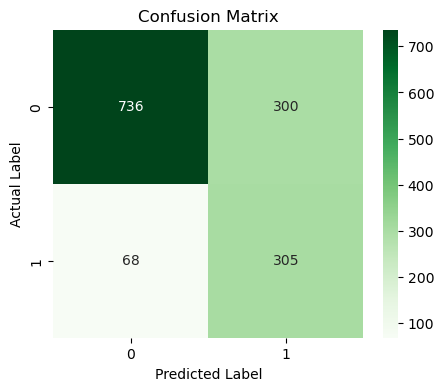

In [113]:
# Plot confusion matrix using seaborn
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()